# problem statement
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
company = pd.read_csv("C:\\Users\\ubed shaikh\\OneDrive\\Desktop\\Data Science\\Company_Data.csv")
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# EDA

In [4]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
# Covertin Sales column into two categories "low" and "high" at mean

sales_category = []
for value in company["Sales"]:
    if value <= 7.49:
        sales_category.append("Low")
    else:
        sales_category.append("High")
company["SalesCategory"] = sales_category

In [7]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,SalesCategory
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,Low
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,Low
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,Low


In [8]:
company.SalesCategory.value_counts()

Low     201
High    199
Name: SalesCategory, dtype: int64

In [9]:
company['SalesCategory'] = company.Sales.map(lambda x: 1 if x > 7.4963 else 0)

In [10]:
company.SalesCategory

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: SalesCategory, Length: 400, dtype: int64

In [11]:
#Encoding the dataset

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
company['ShelveLoc'] = label_encoder.fit_transform(company['ShelveLoc'])
company['Urban'] = label_encoder.fit_transform(company['Urban'])
company['US'] = label_encoder.fit_transform(company['US'])

In [12]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,SalesCategory
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1,0
397,7.41,162,26,12,368,159,2,40,18,1,1,0
398,5.94,100,79,7,284,95,0,50,12,1,1,0


In [13]:
#Creating input and output variables

x = company.iloc[:,1:11]
y = company.iloc[:,11]

In [14]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [15]:
y

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: SalesCategory, Length: 400, dtype: int64

In [16]:
num_trees = 100
max_features = 4
kfold = KFold(n_splits = 10)
model = RandomForestClassifier(n_estimators = num_trees, max_features = max_features)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.8074999999999999


# Checking with other ensemble techniques
1. Bagging

In [17]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

kfold = KFold(n_splits = 10)
cart = DecisionTreeClassifier()
num_trees = 100
model_bag = BaggingClassifier(base_estimator = cart, n_estimators = 100)
results = cross_val_score(model_bag, x, y, cv=kfold)
print(results.mean())

0.8125


 2. Boosting

In [18]:
from sklearn.ensemble import AdaBoostClassifier

num_trees = 20
kfold = KFold(n_splits = 10)
model_boost = AdaBoostClassifier(n_estimators = num_trees)
results = cross_val_score(model_boost, x, y, cv=kfold)
print(results.mean())

0.82


3. Stacking

In [19]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# create the sub models

estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))

#model3 = SVC()
#estimators.append(('svm', model3))

model3 = AdaBoostClassifier(n_estimators = num_trees)
estimators.append(('svm', model3))

# create the ensemble model

ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, x, y, cv=kfold)
print(results.mean())

0.8225


# Inference :
Accuracy on the test data is 82.5% .

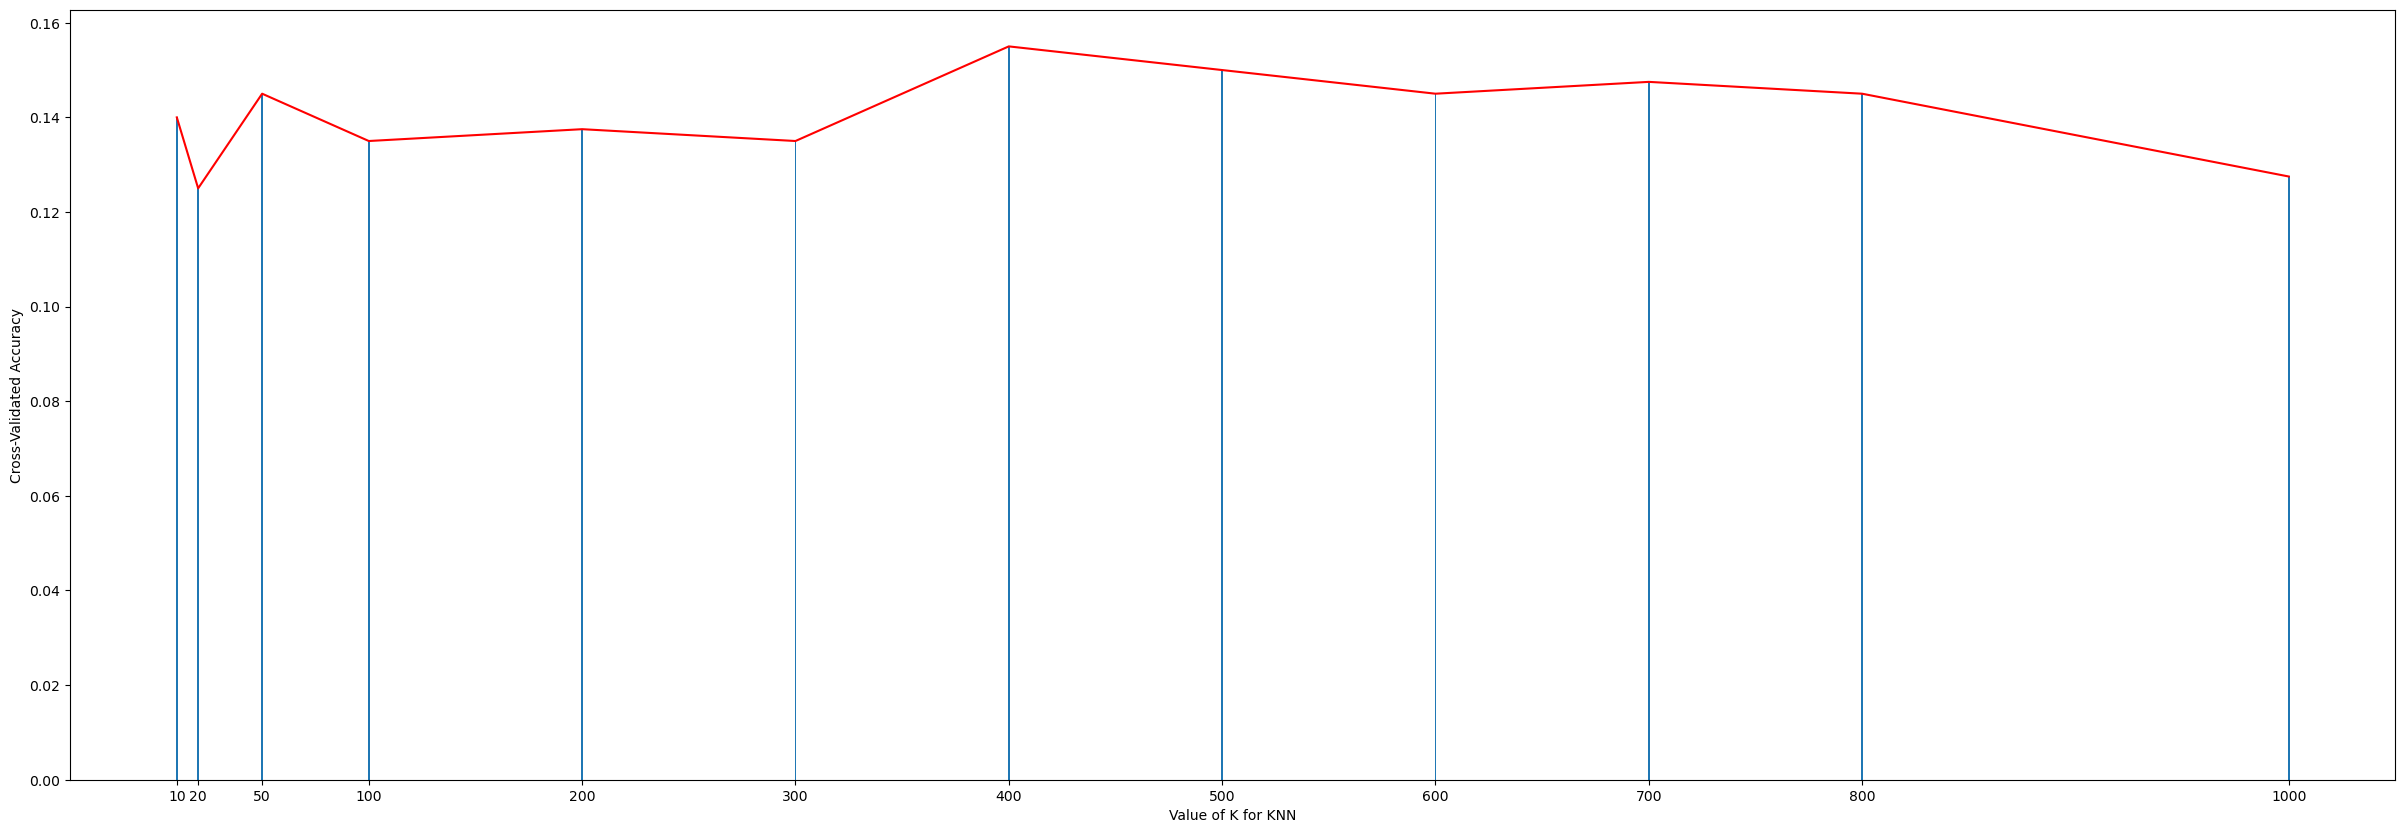

In [20]:
import matplotlib.pyplot as plt 
%matplotlib inline

# choose k between 1 to 41

num_trees = [10,20,50,100,200,300,400,500,600,700,800,1000]
k_scores = []
array = company

X = array.iloc[:,0:8]
Y = array.iloc[:,8]

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation

for k in num_trees:
    rf = RandomForestClassifier(n_estimators=k)
    scores = cross_val_score(rf, X, Y, cv=10)
    k_scores.append(scores.mean())
    
# plot to see clearly

plt.figure(figsize=(30,10))
plt.bar(num_trees, k_scores)
plt.plot(num_trees, k_scores,color="red")

plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(num_trees)
plt.show()